# DS-SF-34 | Unit Project | 3 | Machine Learning Modeling and Executive Summary | Starter Code

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.  You will summarize and present your findings and the methods you used.

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.formula.api as smf
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

df

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [3]:
df.admit.value_counts()

0    271
1    126
Name: admit, dtype: int64

## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether an applicant was admitted.

In [4]:
# TODO
pd.crosstab(df.prestige,
    df.admit,
    rownames = ['prestige'],
    colnames = ['admit'])

admit,0,1
prestige,,
1,28,33
2,95,53
3,93,28
4,55,12


## Part B.  Feature Engineering

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [5]:
prestige_dummies = pd.get_dummies(df.prestige, prefix = 'prestige')

> ### Question 3.  How many of these binary variables do we need for modeling?

Answer: 
We only need 3 of the 4

> ### Question 4.  Why are we doing this?

Answer: 
because the first one is the baseline odds

> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [6]:
#TODO
df = df.join(prestige_dummies)
#df.drop('prestige', axis = 1, inplace = True)

In [7]:
df.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether an applicant was admitted.

In [8]:
# TODO
pd.crosstab(df['prestige_1.0'],
    df.admit,
    rownames = ['prestige_1'],
    colnames = ['admit'])

admit,0,1
prestige_1,,
0,243,93
1,28,33


> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [9]:
# TODO

prob_A = 33./(28 + 33)
odds_A = prob_A / (1 - prob_A)

print prob_A
print odds_A

0.540983606557
1.17857142857


> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [10]:
# TODO

prob_B = 93./(243 + 93)
odds_B = prob_B / (1 - prob_B)

print prob_B
print odds_B

0.276785714286
0.382716049383


> ### Question 9.  Finally, what's the odds ratio?

In [11]:
# TODO
odds_A / odds_B

3.079493087557604

> ### Question 10.  Write this finding in a sentence.

Answer: 
Just over 50% of students that went to top colleges are admitted to Grad School. That means that for every 1 student that isn't admitted 1.18 students are admitted (odds of admission 1.18:1).

For students that didn't attend the top colleges, their admission rate is 27.7%, or just over 1/4. The odds of admission for these students is 0.38:1, which means for every one student that is rejected, only .38 are admitted.

The odds ratio is 3:1

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentence.

In [12]:
# TODO
prob_prest2 = 53./(95 + 53)
odds_prest2 = prob_prest2 / (1 - prob_prest2)

print "Prestige 2", prob_prest2, "probability"
print "Prestige 2", odds_prest2,  "odds"

prob_prest3 = 28./(93 + 28)
odds_prest3 = prob_prest3 / (1 - prob_prest3)

print "Prestige 3", prob_prest3, "probability"
print "Prestige 3", odds_prest3,  "odds"

prob_prest4 = 12./(55 + 12)
odds_prest4 = prob_prest4 / (1 - prob_prest4)

print "Prestige 4", prob_prest4, "probability"
print "Prestige 4", odds_prest4,  "odds"

Prestige 2 0.358108108108 probability
Prestige 2 0.557894736842 odds
Prestige 3 0.231404958678 probability
Prestige 3 0.301075268817 odds
Prestige 4 0.179104477612 probability
Prestige 4 0.218181818182 odds


Answer: 
This seems like the same question as Question 8. "Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college"... assuming that "the least prestigious undergraduate schools" are all those not ranked #1... Unless you mean to do each of the schools separately which I did because the question was unclear.

## Part D. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model predicting admission into UCLA using `gre`, `gpa`, and the `prestige` of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

In [13]:
# TODO
df['intercept'] = 1
variables = ['prestige_2.0','prestige_3.0','prestige_4.0','gre','gpa', 'intercept']
import statsmodels.api as sm
model_logit = sm.Logit(df['admit'], df[variables]).fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


> ### Question 13.  Print the model's summary results.

In [14]:
# TODO
print model_logit.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:                 0.08166
Time:                        13:44:18   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.72

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [15]:
print model_logit.conf_int()

                     0         1
prestige_2.0 -1.301337 -0.058936
prestige_3.0 -2.014579 -0.662776
prestige_4.0 -2.371624 -0.735197
gre           0.000074  0.004362
gpa           0.127619  1.431056
intercept    -6.116077 -1.637631


There is clearly an inverse relationship between the probability of admission and the prestige of the undergrad school

In [16]:
# TODO
pd.DataFrame(data = np.exp(model_logit.params), columns = ['odds ratio']).sort_values(by = "odds ratio", ascending = False)

,odds ratio
gpa,2.180027
gre,1.002221
prestige_2.0,0.506548
prestige_3.0,0.262192
prestige_4.0,0.211525
intercept,0.020716


> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

Answer:  According to the odds ratios, the odds of admission will decrease by about 50% for schools with prestige = 2

> ### Question 16.  Interpret the odds ratio of `gpa`.

Answer: For every standard deviation above the mean GPA the adds of admission will double (2.18x). 

> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [17]:
# TODO
print "prestige 1", model_logit.predict([0,0,0,800,4,1])
print "prestige 2", model_logit.predict([1,0,0,800,4,1])
print "prestige 3", model_logit.predict([0,1,0,800,4,1])
print "prestige 4", model_logit.predict([0,0,1,800,4,1])

prestige 1 [ 0.73403998]
prestige 2 [ 0.58299512]
prestige 3 [ 0.41983282]
prestige 4 [ 0.36860803]


Answer: probabilities printed above ^

## Part E. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [18]:
# TODO
X = df[ ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0'] ]
c = df.admit

model = linear_model.LogisticRegression().\
    fit(X, c)

> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

In [19]:
# TODO
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,257,103
1,14,23


In [20]:
names_X = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
zip(names_X, np.exp(model.coef_[0]) - 1)

[('gre', 0.001786565692631914),
 ('gpa', 0.26149128385513509),
 ('prestige_2.0', -0.45309199671330236),
 ('prestige_3.0', -0.69029949760096398),
 ('prestige_4.0', -0.74774074871507956)]

Answer: TODO

The odds that someone who went to a school of **prestige 2.0** is admitted to grad school at UCLA is e^-0.45 = 0.64 OR 36% less than someone who went to the top schools (prestige 1.0).

The odds that someone who went to a school of **prestige 3.0** is admitted to grad school at UCLA is e^-0.69 = 0.50 OR 50% less than someone who went to the top schools (prestige 1.0).

The odds that someone who went to a school of **prestige 4.0** is admitted to grad school at UCLA is e^-0.75 = 0.47 OR 53% less than someone who went to the top schools (prestige 1.0).

> ### Question 20.  Again, assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [21]:
# TODO

print "prestige 1", model.predict_proba([[800, 4, 0, 0, 0]])
print "prestige 2", model.predict_proba([[800, 4, 1, 0, 0]])
print "prestige 3", model.predict_proba([[800, 4, 0, 1, 0]])
print "prestige 4", model.predict_proba([[800, 4, 0, 0, 1]])

prestige 1 [[ 0.36815534  0.63184466]]
prestige 2 [[ 0.51582873  0.48417127]]
prestige 3 [[ 0.6529453  0.3470547]]
prestige 4 [[ 0.6978666  0.3021334]]


Answer: TODO
- Tier 1: 63%
- Tier 2: 48%
- Tier 3: 35%
- Tier 4: 30%

## Part F.  Executive Summary

> ## Question 21.  Introduction
>
> Write a problem statement for this project.

Answer: TODO
Given a student's GPA and GRE score as well as the ranking of their undergraduate school, one can predict whether or not said student will be admitted to UCLA's graduate program.

> ## Question 22.  Dataset
>
> Write up a description of your data and any cleaning that was completed.

In [22]:
df.describe()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,intercept
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397
mean,0.317380,587.858942,3.392242,2.488665,0.153652,0.372796,0.304786,0.168766,1
std,0.466044,115.717787,0.380208,0.947083,0.361070,0.484159,0.460898,0.375017,0
min,0.000000,220.000000,2.260000,1.000000,0.000000,0.000000,0.000000,0.000000,1
25%,0.000000,520.000000,3.130000,2.000000,0.000000,0.000000,0.000000,0.000000,1
50%,0.000000,580.000000,3.400000,2.000000,0.000000,0.000000,0.000000,0.000000,1
75%,1.000000,660.000000,3.670000,3.000000,0.000000,1.000000,1.000000,0.000000,1
max,1.000000,800.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1


Answer: TODO <br>
**The original dataset included 4 columns:**
1. admit (the predictor class, binary, 1 for admitted and 0 for not)
2. gre (a student's grad school entrance test score, a continuous numeric variable 220 to 800)
3. gpa (a student's grade point average, a continuous numeric variable ranging from 0 to 4)
4. prestige (a categorical ranking variable ordering undergrad schools by order of regard)

Because prestige was a multi-level categorical variable I created dummies for the 4 possible values, creating 4 new variables: 
 - prestige_1.0 
 - prestige_2.0 
 - prestige_3.0
 - prestige_4.0
 
 And I dropped `prestige` as it was no longer needed

> ## Question 23.  Demo
>
> Provide a table that explains the data by admission status.

In [23]:
df.groupby('admit').describe()

gpa         gre  intercept    prestige  prestige_1.0  \
admit                                                                      
0     count  271.000000  271.000000        271  271.000000    271.000000   
      mean     3.347159  573.579336          1    2.645756      0.103321   
      std      0.376355  116.052798          0    0.918922      0.304941   
      min      2.260000  220.000000          1    1.000000      0.000000   
      25%      3.080000  500.000000          1    2.000000      0.000000   
      50%      3.340000  580.000000          1    3.000000      0.000000   
      75%      3.610000  660.000000          1    3.000000      0.000000   
      max      4.000000  800.000000          1    4.000000      1.000000   
1     count  126.000000  126.000000        126  126.000000    126.000000   
      mean     3.489206  618.571429          1    2.150794      0.261905   
      std      0.371655  109.257233          0    0.921455      0.441426   
      min      2.420000  300.000000          1    1.000000      0.000000   
      25%      3.220000  540.000000          1    1.000000      0.000000   
      50%      3.545000  620.000000          1    2.000000      0.000000   
      75%      3.757500  680.000000          1    3.000000      1.000000   
      max      4.000000  800.000000          1    4.000000      1.000000   

             prestige_2.0  prestige_3.0  prestige_4.0  
admit                                                  
0     count    271.000000    271.000000    271.000000  
      mean       0.350554      0.343173      0.202952  
      std        0.478026      0.475647      0.402941  
      min        0.000000      0.000000      0.000000  
      25%        0.000000      0.000000      0.000000  
      50%        0.000000      0.000000      0.000000  
      75%        1.000000      1.000000      0.000000  
      max        1.000000      1.000000      1.000000  
1     count    126.000000    126.000000    126.000000  
      mean       0.420635      0.222222      0.095238  
      std        0.495632      0.417399      0.294715  
      min        0.000000      0.000000      0.000000  
      25%        0.000000      0.000000      0.000000  
      50%        0.000000      0.000000      0.000000  
      75%        1.000000      0.000000      0.000000  
      max        1.000000      1.000000      1.000000

> ## Question 24.  Methods
>
> Write up the methods used in your analysis.

Answer: I used 

> ## Question 25.  Results
>
> Write up your results.

Answer: TODO

> ## Question 26.  Visuals
>
> Provide a table or visualization of these results.

In [24]:
df['admit_pred'] = model_logit.predict(df[variables])

In [25]:
#Answer: TODO
# def isolate_and_plot(variable):
#     # isolate gre and class rank
#     grouped = pd.pivot_table(df, values=['admit_pred'], index=[variable, 'prestige'],
#                             aggfunc=np.mean)
#     # make a plot
#     df['admit_pred'] = model_logit.predict(df[variable])
#     colors = 'rbgyrbgy'
#     for col in df.prestige.unique():
#         plt_data = df.ix[df.index==col]
#         pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
#                 color=colors[int(col)])
#     pl.xlabel(variable)
#     pl.ylabel("P(admit=1)")
#     pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
#     pl.title("Prob(admit=1) isolating " + variable + " and presitge")
#     pl.show()

    
# isolate_and_plot('gre')
# isolate_and_plot('gpa')

prestige
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
Name: admit_pred, dtype: object

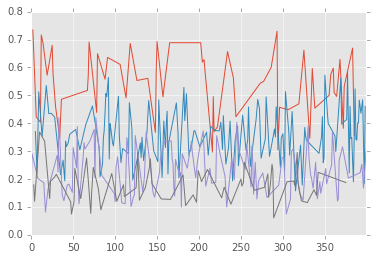

In [29]:
df.groupby('prestige').admit_pred.plot(figsize = (20,20))

> ## Question 27.  Discussion
>
> Write up your discussion and future steps.

Answer: TODO